# Currency Market Predictor - Recurrent Neural Netowork

Predicting EURUSD market

In [2]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [3]:
dataset = pd.read_csv('M1TechnicalIndicators.csv',usecols=[1,2,3,4,5,6,7,8,9,10])
dataset.head(2)

,close,closeTarget,k,d,atr,macdmain,macdsgnal,bbup,bbmid,bblow
0,1.16831,1.16833,66.101695,84.903097,0.000164,-6.314161e-06,84.903097,1.168795,1.168415,1.168034
1,1.16833,1.16842,88.607595,90.104971,0.000150,-9.244212e-07,90.104971,1.168840,1.168437,1.168033


#### Normalize

In [4]:
datasetNorm = (dataset - dataset.mean()) / (dataset.max() - dataset.min())
datasetNorm.head(2)

,close,closeTarget,k,d,atr,macdmain,macdsgnal,bbup,bbmid,bblow
0,0.019084,0.019678,0.160252,0.348290,-0.010598,-0.002514,0.348290,0.020240,0.023543,0.025458
1,0.019679,0.022357,0.385311,0.400309,-0.019556,-0.000335,0.400309,0.021616,0.024238,0.025413


## Hyperparams

In [5]:
tf.reset_default_graph()
num_epochs = 100

batch_size = 1

total_series_length = len(dataset.index)

truncated_backprop_length = 3 #The size of the sequence

state_size = 12 #The number of neurons

num_features = 9#4
num_classes = 1 #[1,0]

num_batches = total_series_length//batch_size//truncated_backprop_length

min_test_size = 100

print('The total series length is: %d' %total_series_length)
print('The current configuration gives us %d batches of %d observations each one looking %d steps in the past' 
      %(num_batches,batch_size,truncated_backprop_length))

The total series length is: 30203
The current configuration gives us 10067 batches of 1 observations each one looking 3 steps in the past


## Train-Test split

In [6]:
datasetTrain = datasetNorm[dataset.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(datasetNorm.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(datasetNorm.index)-i
        break

datasetTest =  datasetNorm[dataset.index >= test_first_idx]

In [7]:
datasetTrain.head(2)

,close,closeTarget,k,d,atr,macdmain,macdsgnal,bbup,bbmid,bblow
0,0.019084,0.019678,0.160252,0.348290,-0.010598,-0.002514,0.348290,0.020240,0.023543,0.025458
1,0.019679,0.022357,0.385311,0.400309,-0.019556,-0.000335,0.400309,0.021616,0.024238,0.025413


In [8]:
datasetTest.head(2)

,close,closeTarget,k,d,atr,macdmain,macdsgnal,bbup,bbmid,bblow
30101,0.079203,0.075928,0.499235,0.333603,-0.077076,0.025199,0.333603,0.066752,0.075583,0.079913
30102,0.075929,0.072357,0.365902,0.111381,-0.084148,0.015102,0.111381,0.066121,0.074620,0.078669


In [9]:
xTrain = datasetTrain[['close',"k","d","atr","macdmain","macdsgnal","bbup","bbmid","bblow"]].as_matrix()
yTrain = datasetTrain['closeTarget'].as_matrix()

In [10]:
print(xTrain[0:3],'\n',yTrain[0:3])

[[ 1.90836451e-02  1.60251943e-01  3.48290330e-01 -1.05982834e-02
  -2.51402631e-03  3.48290330e-01  2.02395756e-02  2.35434767e-02
   2.54580340e-02]
 [ 1.96788832e-02  3.85310943e-01  4.00309070e-01 -1.95563220e-02
  -3.35491478e-04  4.00309070e-01  2.16155025e-02  2.42383928e-02
   2.54126806e-02]
 [ 2.23574546e-02  4.99234994e-01  2.54950421e-01 -1.05982834e-02
   1.45444826e-03  2.54950421e-01  2.28809924e-02  2.49175153e-02
   2.54493797e-02]] 
 [0.01967814 0.02235672 0.02235672]


In [11]:
xTest = datasetTest[['close',"k","d","atr","macdmain","macdsgnal","bbup","bbmid","bblow"]].as_matrix()
yTest = datasetTest['closeTarget'].as_matrix()

In [12]:
print(xTest[0:3],'\n',yTest[0:3])

[[ 0.07920269  0.49923499  0.3336028  -0.07707636  0.02519914  0.3336028
   0.06675158  0.07558321  0.07991293]
 [ 0.07592888  0.36590166  0.11138058 -0.0841485   0.01510158  0.11138058
   0.06612119  0.07461981  0.07866872]
 [ 0.07235745  0.13559863  0.15582502 -0.08650587  0.00726623  0.15582502
   0.06611581  0.07375116  0.0769707 ]] 
 [0.07592814 0.07235672 0.07027338]


## Visualize starting price data

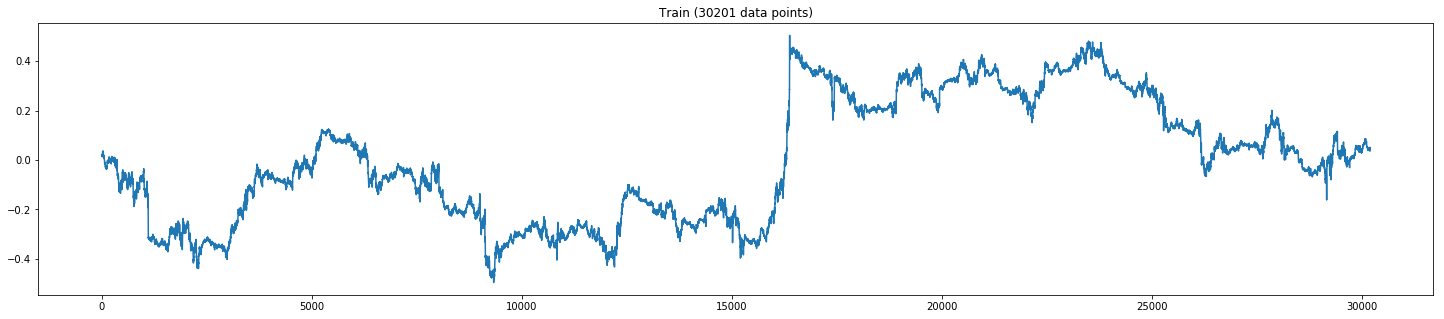

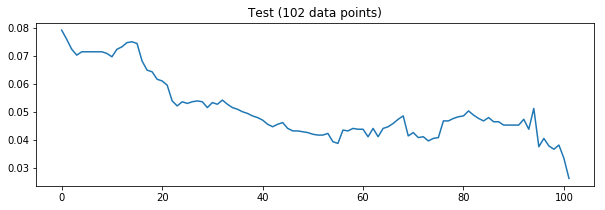

In [13]:
plt.figure(figsize=(25,5))
plt.plot(xTrain[:,0])
plt.title('Train (' +str(len(xTrain))+' data points)')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(xTest[:,0])
plt.title('Test (' +str(len(xTest))+' data points)')
plt.show()

## Placeholders

In [14]:
batchX_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_features],name='data_ph')
batchY_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_classes],name='target_ph')

## Weights and biases
Because is a 3 layer net:
1. Input
2. Hidden Recurrent layer
3. Output

We need 2 pairs of W and b

In [15]:
W2 = tf.Variable(initial_value=np.random.rand(state_size,num_classes),dtype=tf.float32)
tf.summary.histogram("W", W2)
b2 = tf.Variable(initial_value=np.random.rand(1,num_classes),dtype=tf.float32)
tf.summary.histogram("b2", b2)

<tf.Tensor 'b2:0' shape=() dtype=string>

Unpack

In [16]:
labels_series = tf.unstack(batchY_placeholder, axis=1)

## Forward pass - Unroll the cell

Input to recurrent

In [17]:

cell = tf.contrib.rnn.BasicRNNCell(num_units=state_size)
states_series, current_state = tf.nn.dynamic_rnn(cell=cell,inputs=batchX_placeholder,dtype=tf.float32)
tf.summary.histogram("states_series", states_series)
tf.summary.histogram("current_state", current_state)

<tf.Tensor 'current_state:0' shape=() dtype=string>

In [18]:
states_series = tf.transpose(states_series,[1,0,2])

## Backward pass - Output

In [19]:
last_state = tf.gather(params=states_series,indices=states_series.get_shape()[0]-1)
last_label = tf.gather(params=labels_series,indices=len(labels_series)-1)

## Weights and bias out

In [20]:
weight = tf.Variable(tf.truncated_normal([state_size,num_classes]))
tf.summary.histogram("weight", weight)
bias = tf.Variable(tf.constant(0.1,shape=[num_classes]))
tf.summary.histogram("bias", bias)

<tf.Tensor 'bias:0' shape=() dtype=string>

## Prediction, Loss & Optimizer

In [21]:
prediction = tf.matmul(last_state,weight) + bias
prediction

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [22]:
loss = tf.reduce_mean(tf.squared_difference(last_label,prediction))

train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

c:\python35\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
loss_list = []
test_pred_list = []

with tf.Session() as sess:
    train_writer = tf.summary.FileWriter('logs', sess.graph)
    tf.global_variables_initializer().run()
    counter = 0
    for epoch_idx in range(num_epochs):
                
        print('Epoch %d' %epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length * batch_size
            counter+= 1;
            
            batchX = xTrain[start_idx:end_idx,:].reshape(batch_size,truncated_backprop_length,num_features)
            batchY = yTrain[start_idx:end_idx].reshape(batch_size,truncated_backprop_length,1)
                
            #print('IDXs',start_idx,end_idx)
            #print('X',batchX.shape,batchX)
            #print('Y',batchX.shape,batchY)
            
            feed = {batchX_placeholder : batchX, batchY_placeholder : batchY}
            
            #TRAIN!
            _loss,_train_step,_pred,_last_label,_prediction = sess.run(
                fetches=[loss,train_step,prediction,last_label,prediction],
                feed_dict = feed
            )
            
            loss_list.append(_loss)
            
           
            
            if(batch_idx % 50 == 0):
                print('Step %d - Loss: %.6f' %(batch_idx,_loss))
#             merge = tf.summary.merge_all()
#             summary, batch_loss, new_state, _ = sess.run([merge,last_state,last_label,prediction],feed_dict=feed)
#             train_writer.add_summary(summary, counter)
                
    #TEST
    
    
    for test_idx in range(len(xTest) - truncated_backprop_length):
        
        testBatchX = xTest[test_idx:test_idx+truncated_backprop_length,:].reshape((1,truncated_backprop_length,num_features))        
        testBatchY = yTest[test_idx:test_idx+truncated_backprop_length].reshape((1,truncated_backprop_length,1))

        
        #_current_state = np.zeros((batch_size,state_size))
        feed = {batchX_placeholder : testBatchX,
            batchY_placeholder : testBatchY}

        #Test_pred contains 'window_size' predictions, we want the last one
        _last_state,_last_label,test_pred = sess.run([last_state,last_label,prediction],feed_dict=feed)
        test_pred_list.append(test_pred[-1][-1]) #The last one

Epoch 0
Step 0 - Loss: 2.183097
Step 50 - Loss: 0.075703
Step 100 - Loss: 0.009976
Step 150 - Loss: 0.037009
Step 200 - Loss: 0.004984
Step 250 - Loss: 0.000483
Step 300 - Loss: 0.008394
Step 350 - Loss: 0.024083
Step 400 - Loss: 0.006463
Step 450 - Loss: 0.003612
Step 500 - Loss: 0.002666
Step 550 - Loss: 0.015250
Step 600 - Loss: 0.009521
Step 650 - Loss: 0.018286
Step 700 - Loss: 0.002640
Step 750 - Loss: 0.003696
Step 800 - Loss: 0.001623
Step 850 - Loss: 0.004702
Step 900 - Loss: 0.000017
Step 950 - Loss: 0.000333
Step 1000 - Loss: 0.000154
Step 1050 - Loss: 0.001107
Step 1100 - Loss: 0.000001
Step 1150 - Loss: 0.000905
Step 1200 - Loss: 0.001673
Step 1250 - Loss: 0.002308
Step 1300 - Loss: 0.000022
Step 1350 - Loss: 0.000074
Step 1400 - Loss: 0.000131
Step 1450 - Loss: 0.000010
Step 1500 - Loss: 0.000028
Step 1550 - Loss: 0.000017
Step 1600 - Loss: 0.000035
Step 1650 - Loss: 0.000225
Step 1700 - Loss: 0.000004
Step 1750 - Loss: 0.000017
Step 1800 - Loss: 0.000278
Step 1850 - Loss

Step 5200 - Loss: 0.000092
Step 5250 - Loss: 0.000029
Step 5300 - Loss: 0.000000
Step 5350 - Loss: 0.000001
Step 5400 - Loss: 0.000225
Step 5450 - Loss: 0.000435
Step 5500 - Loss: 0.000191
Step 5550 - Loss: 0.000035
Step 5600 - Loss: 0.000295
Step 5650 - Loss: 0.003156
Step 5700 - Loss: 0.001065
Step 5750 - Loss: 0.000007
Step 5800 - Loss: 0.001714
Step 5850 - Loss: 0.000500
Step 5900 - Loss: 0.000000
Step 5950 - Loss: 0.000025
Step 6000 - Loss: 0.000002
Step 6050 - Loss: 0.000046
Step 6100 - Loss: 0.000041
Step 6150 - Loss: 0.000073
Step 6200 - Loss: 0.000001
Step 6250 - Loss: 0.000007
Step 6300 - Loss: 0.000237
Step 6350 - Loss: 0.000160
Step 6400 - Loss: 0.000000
Step 6450 - Loss: 0.000024
Step 6500 - Loss: 0.000079
Step 6550 - Loss: 0.000059
Step 6600 - Loss: 0.000009
Step 6650 - Loss: 0.000250
Step 6700 - Loss: 0.000384
Step 6750 - Loss: 0.000033
Step 6800 - Loss: 0.000056
Step 6850 - Loss: 0.000000
Step 6900 - Loss: 0.000173
Step 6950 - Loss: 0.000000
Step 7000 - Loss: 0.000017
S

Step 300 - Loss: 0.000149
Step 350 - Loss: 0.000000
Step 400 - Loss: 0.000010
Step 450 - Loss: 0.000026
Step 500 - Loss: 0.000000
Step 550 - Loss: 0.000002
Step 600 - Loss: 0.000000
Step 650 - Loss: 0.000431
Step 700 - Loss: 0.000512
Step 750 - Loss: 0.000001
Step 800 - Loss: 0.000000
Step 850 - Loss: 0.000037
Step 900 - Loss: 0.000002
Step 950 - Loss: 0.000000
Step 1000 - Loss: 0.000000
Step 1050 - Loss: 0.000003
Step 1100 - Loss: 0.000049
Step 1150 - Loss: 0.000045
Step 1200 - Loss: 0.000023
Step 1250 - Loss: 0.000023
Step 1300 - Loss: 0.000000
Step 1350 - Loss: 0.000000
Step 1400 - Loss: 0.000008
Step 1450 - Loss: 0.000007
Step 1500 - Loss: 0.000017
Step 1550 - Loss: 0.000000
Step 1600 - Loss: 0.000009
Step 1650 - Loss: 0.000004
Step 1700 - Loss: 0.000004
Step 1750 - Loss: 0.000001
Step 1800 - Loss: 0.000010
Step 1850 - Loss: 0.000000
Step 1900 - Loss: 0.000001
Step 1950 - Loss: 0.000003
Step 2000 - Loss: 0.000000
Step 2050 - Loss: 0.000001
Step 2100 - Loss: 0.000011
Step 2150 - Los

Step 5400 - Loss: 0.000108
Step 5450 - Loss: 0.000006
Step 5500 - Loss: 0.000215
Step 5550 - Loss: 0.000010
Step 5600 - Loss: 0.000152
Step 5650 - Loss: 0.000003
Step 5700 - Loss: 0.000008
Step 5750 - Loss: 0.000000
Step 5800 - Loss: 0.000620
Step 5850 - Loss: 0.000046
Step 5900 - Loss: 0.000006
Step 5950 - Loss: 0.000001
Step 6000 - Loss: 0.000000
Step 6050 - Loss: 0.000045
Step 6100 - Loss: 0.000000
Step 6150 - Loss: 0.000004
Step 6200 - Loss: 0.000003
Step 6250 - Loss: 0.000000
Step 6300 - Loss: 0.000049
Step 6350 - Loss: 0.000020
Step 6400 - Loss: 0.000002
Step 6450 - Loss: 0.000016
Step 6500 - Loss: 0.000003
Step 6550 - Loss: 0.000000
Step 6600 - Loss: 0.000003
Step 6650 - Loss: 0.000069
Step 6700 - Loss: 0.000000
Step 6750 - Loss: 0.000000
Step 6800 - Loss: 0.000002
Step 6850 - Loss: 0.000001
Step 6900 - Loss: 0.000014
Step 6950 - Loss: 0.000021
Step 7000 - Loss: 0.000033
Step 7050 - Loss: 0.000008
Step 7100 - Loss: 0.000004
Step 7150 - Loss: 0.000032
Step 7200 - Loss: 0.000005
S

Step 500 - Loss: 0.000001
Step 550 - Loss: 0.000001
Step 600 - Loss: 0.000000
Step 650 - Loss: 0.000222
Step 700 - Loss: 0.000098
Step 750 - Loss: 0.000000
Step 800 - Loss: 0.000030
Step 850 - Loss: 0.000020
Step 900 - Loss: 0.000000
Step 950 - Loss: 0.000000
Step 1000 - Loss: 0.000005
Step 1050 - Loss: 0.000010
Step 1100 - Loss: 0.000019
Step 1150 - Loss: 0.000002
Step 1200 - Loss: 0.000005
Step 1250 - Loss: 0.000004
Step 1300 - Loss: 0.000000
Step 1350 - Loss: 0.000001
Step 1400 - Loss: 0.000000
Step 1450 - Loss: 0.000006
Step 1500 - Loss: 0.000008
Step 1550 - Loss: 0.000003
Step 1600 - Loss: 0.000007
Step 1650 - Loss: 0.000003
Step 1700 - Loss: 0.000000
Step 1750 - Loss: 0.000012
Step 1800 - Loss: 0.000004
Step 1850 - Loss: 0.000000
Step 1900 - Loss: 0.000003
Step 1950 - Loss: 0.000001
Step 2000 - Loss: 0.000002
Step 2050 - Loss: 0.000009
Step 2100 - Loss: 0.000001
Step 2150 - Loss: 0.000000
Step 2200 - Loss: 0.000021
Step 2250 - Loss: 0.000002
Step 2300 - Loss: 0.000003
Step 2350 -

Step 5650 - Loss: 0.000001
Step 5700 - Loss: 0.000005
Step 5750 - Loss: 0.000003
Step 5800 - Loss: 0.000397
Step 5850 - Loss: 0.000018
Step 5900 - Loss: 0.000004
Step 5950 - Loss: 0.000002
Step 6000 - Loss: 0.000008
Step 6050 - Loss: 0.000038
Step 6100 - Loss: 0.000000
Step 6150 - Loss: 0.000005
Step 6200 - Loss: 0.000004
Step 6250 - Loss: 0.000000
Step 6300 - Loss: 0.000064
Step 6350 - Loss: 0.000013
Step 6400 - Loss: 0.000003
Step 6450 - Loss: 0.000000
Step 6500 - Loss: 0.000001
Step 6550 - Loss: 0.000000
Step 6600 - Loss: 0.000001
Step 6650 - Loss: 0.000050
Step 6700 - Loss: 0.000001
Step 6750 - Loss: 0.000001
Step 6800 - Loss: 0.000002
Step 6850 - Loss: 0.000015
Step 6900 - Loss: 0.000008
Step 6950 - Loss: 0.000011
Step 7000 - Loss: 0.000000
Step 7050 - Loss: 0.000009
Step 7100 - Loss: 0.000000
Step 7150 - Loss: 0.000044
Step 7200 - Loss: 0.000002
Step 7250 - Loss: 0.000003
Step 7300 - Loss: 0.000001
Step 7350 - Loss: 0.000002
Step 7400 - Loss: 0.000000
Step 7450 - Loss: 0.000029
S

Step 650 - Loss: 0.000148
Step 700 - Loss: 0.000099
Step 750 - Loss: 0.000000
Step 800 - Loss: 0.000002
Step 850 - Loss: 0.000015
Step 900 - Loss: 0.000001
Step 950 - Loss: 0.000000
Step 1000 - Loss: 0.000003
Step 1050 - Loss: 0.000003
Step 1100 - Loss: 0.000015
Step 1150 - Loss: 0.000000
Step 1200 - Loss: 0.000000
Step 1250 - Loss: 0.000002
Step 1300 - Loss: 0.000001
Step 1350 - Loss: 0.000002
Step 1400 - Loss: 0.000004
Step 1450 - Loss: 0.000007
Step 1500 - Loss: 0.000006
Step 1550 - Loss: 0.000008
Step 1600 - Loss: 0.000011
Step 1650 - Loss: 0.000004
Step 1700 - Loss: 0.000002
Step 1750 - Loss: 0.000012
Step 1800 - Loss: 0.000005
Step 1850 - Loss: 0.000000
Step 1900 - Loss: 0.000001
Step 1950 - Loss: 0.000003
Step 2000 - Loss: 0.000002
Step 2050 - Loss: 0.000000
Step 2100 - Loss: 0.000003
Step 2150 - Loss: 0.000001
Step 2200 - Loss: 0.000025
Step 2250 - Loss: 0.000001
Step 2300 - Loss: 0.000002
Step 2350 - Loss: 0.000004
Step 2400 - Loss: 0.000035
Step 2450 - Loss: 0.000002
Step 250

Step 5750 - Loss: 0.000001
Step 5800 - Loss: 0.000339
Step 5850 - Loss: 0.000005
Step 5900 - Loss: 0.000001
Step 5950 - Loss: 0.000002
Step 6000 - Loss: 0.000018
Step 6050 - Loss: 0.000025
Step 6100 - Loss: 0.000001
Step 6150 - Loss: 0.000002
Step 6200 - Loss: 0.000006
Step 6250 - Loss: 0.000000
Step 6300 - Loss: 0.000042
Step 6350 - Loss: 0.000019
Step 6400 - Loss: 0.000005
Step 6450 - Loss: 0.000002
Step 6500 - Loss: 0.000007
Step 6550 - Loss: 0.000000
Step 6600 - Loss: 0.000000
Step 6650 - Loss: 0.000048
Step 6700 - Loss: 0.000002
Step 6750 - Loss: 0.000003
Step 6800 - Loss: 0.000000
Step 6850 - Loss: 0.000026
Step 6900 - Loss: 0.000001
Step 6950 - Loss: 0.000006
Step 7000 - Loss: 0.000004
Step 7050 - Loss: 0.000004
Step 7100 - Loss: 0.000001
Step 7150 - Loss: 0.000022
Step 7200 - Loss: 0.000005
Step 7250 - Loss: 0.000010
Step 7300 - Loss: 0.000001
Step 7350 - Loss: 0.000007
Step 7400 - Loss: 0.000001
Step 7450 - Loss: 0.000035
Step 7500 - Loss: 0.000048
Step 7550 - Loss: 0.000000
S

In [ ]:
accuracy, update_op = tf.metrics.accuracy(
    last_label,
    prediction,
    weights=weight,
    metrics_collections=None,
    updates_collections=None,
    name=None
)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Loss')
plt.scatter(x=np.arange(0,len(loss_list)),y=loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();

In [ ]:
plt.figure(figsize=(21,7))
plt.plot(yTest,label='Price',color='blue')
plt.plot(test_pred_list,label='Predicted',color='red')
plt.title('Price vs Predicted')
plt.legend(loc='upper left')
plt.show()